<a href="https://colab.research.google.com/github/maria2021831011/computer_vision/blob/main/training_cnn_from_scratch_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Jan 28 05:57:37 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   77C    P0             32W /   70W |    6522MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!unzip -qq '/content/archive (8).zip'

replace test/apples/img_p1_111.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import tensorflow
from tensorflow import keras

from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [ ]:
training_data=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_dataset=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 294 files belonging to 2 classes.
Found 97 files belonging to 2 classes.


In [ ]:
#normalization

def process(image,label):
  image=tensorflow.cast(image/255. ,tensorflow.float32)
  return image,label

training_data=training_data.map(process)
validation_dataset=validation_dataset.map(process)



In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))



model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))








/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


apple-0
orange-1


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(training_data,epochs=10,validation_data=validation_dataset)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5538 - loss: 5.3322 - val_accuracy: 0.5155 - val_loss: 1.0760
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6800 - loss: 5.1893 - val_accuracy: 0.5258 - val_loss: 2.6602
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6987 - loss: 4.7848 - val_accuracy: 0.5567 - val_loss: 5.8472
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.7853 - loss: 2.4764 - val_accuracy: 0.5567 - val_loss: 9.1919
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.7266 - loss: 4.8364 - val_accuracy: 0.5567 - val_loss: 14.3266
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.8412 - loss: 1.7142 - val_accuracy: 0.5567 - val_loss: 19.2850
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.8302 - loss: 1.0865 - val_accuracy: 0.5567 - val_loss: 18.8294
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.8409 - loss: 1.6458 - val_accuracy: 0.5567 

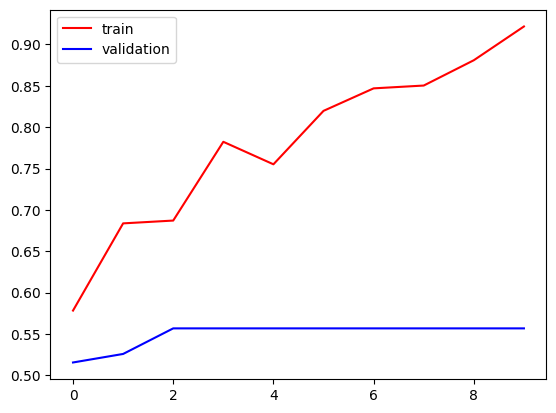

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


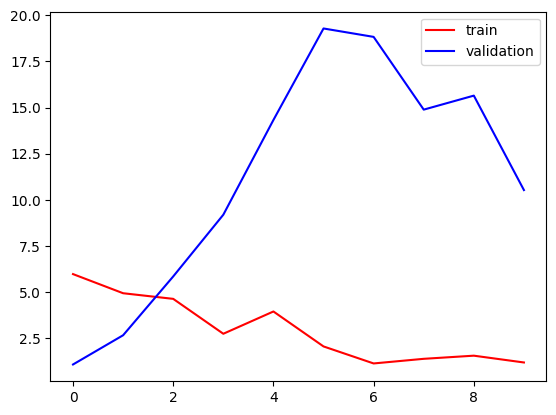

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [ ]:
#way to reduce overfitting
#more data add
#data augmentation
#dropout
#reduce complexity
#batch norm

array([[[238, 234, 229],
        [243, 239, 234],
        [251, 247, 242],
        ...,
        [187, 192, 183],
        [192, 197, 188],
        [192, 197, 188]],

       [[231, 225, 220],
        [235, 231, 226],
        [245, 241, 236],
        ...,
        [189, 194, 185],
        [195, 200, 191],
        [201, 206, 197]],

       [[223, 214, 210],
        [227, 221, 216],
        [238, 232, 227],
        ...,
        [191, 196, 187],
        [200, 205, 196],
        [199, 204, 195]],

       ...,

       [[ 87, 122, 125],
        [ 81, 117, 117],
        [ 84, 122, 122],
        ...,
        [129, 141, 113],
        [132, 143, 117],
        [127, 136, 115]],

       [[ 88, 122, 122],
        [ 81, 117, 117],
        [ 82, 120, 120],
        ...,
        [131, 143, 115],
        [135, 146, 120],
        [140, 150, 127]],

       [[ 76, 110, 110],
        [ 79, 115, 115],
        [ 81, 118, 116],
        ...,
        [133, 145, 117],
        [137, 148, 122],
        [134, 144, 121]]], dtype=uint8)
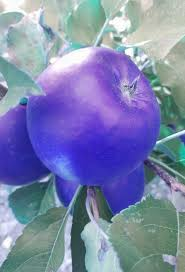

In [ ]:
import cv2
test_img=cv2.imread('/content/test/apples/img_p1_111.jpeg')
test_img

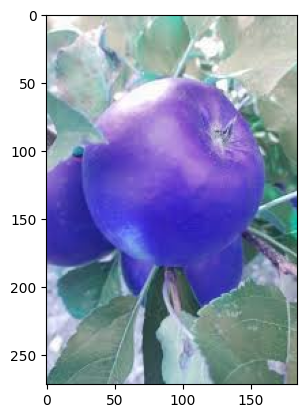

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img=cv2.resize(test_img,(256,256))
test_img.shape

(256, 256, 3)

In [ ]:
test_inut=test_img.reshape((1,256,256,3))
test_inut

array([[[[238, 234, 229],
         [241, 237, 231],
         [245, 241, 236],
         ...,
         [191, 195, 186],
         [192, 197, 188],
         [192, 197, 188]],

        [[230, 224, 219],
         [232, 227, 223],
         [237, 233, 228],
         ...,
         [193, 198, 189],
         [197, 203, 194],
         [201, 206, 197]],

        [[222, 213, 209],
         [225, 217, 212],
         [230, 223, 218],
         ...,
         [198, 203, 194],
         [200, 205, 197],
         [200, 205, 197]],

        ...,

        [[ 86, 121, 124],
         [ 83, 118, 120],
         [ 81, 118, 118],
         ...,
         [131, 142, 115],
         [130, 140, 117],
         [128, 137, 116]],

        [[ 88, 122, 122],
         [ 84, 119, 119],
         [ 81, 118, 118],
         ...,
         [133, 145, 118],
         [136, 147, 122],
         [139, 149, 126]],

        [[ 76, 110, 110],
         [ 78, 113, 113],
         [ 80, 116, 115],
         ...,
         [136, 147, 120],
        

In [ ]:
result=model.predict(test_inut)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)

In [ ]:
if result>0.5:
  print('apple')
else:
  print('orange')

apple
